# Clustering Particional

## Machine Learning. Grado en Ciencia de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from scipy.cluster import vq
from sklearn.cluster import KMeans,DBSCAN

%matplotlib inline

### El conjunto de datos

Los datos sobre los que vamos a trabajar se basan en el conjunto de datos `protein`. Después de examinar los datos, vemos que los datos están separados por un tabulador y que los nombres de los países están en la primera columna. Para cargarlos debemos ejecutar la siguiente instrucción, en la que le indicamos el carácter de separación y que el nombre del país va a ser el índice del data frame.

In [2]:
proteindata = pd.read_csv('proteindata.txt', sep='\t', index_col=0)

Vamos a examinar los datos para ver si se han leído correctamente

In [3]:
proteindata

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,FruitVeg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechosl.,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4
EGermany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6
Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4
France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5


Aparentemente, todos los datos han sido leídos correctamente. Sin embargo, nos queda por comprobar si los tipos asignados son los adecuados.

In [4]:
proteindata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Albania to Yugosl.
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RedMeat    25 non-null     float64
 1   WhiteMeat  25 non-null     float64
 2   Eggs       25 non-null     float64
 3   Milk       25 non-null     float64
 4   Fish       25 non-null     float64
 5   Cereals    25 non-null     float64
 6   Starch     25 non-null     float64
 7   Nuts       25 non-null     float64
 8   FruitVeg   25 non-null     float64
dtypes: float64(9)
memory usage: 2.0+ KB


Una vez comprobado que hemos leído correctamente los datos, tenemos que comprobar cómo están distribuidos los datos, para ver si es necesario una estandarización de los mismos. Para ello podemos realizar un gráfico de barras.

<Axes: >

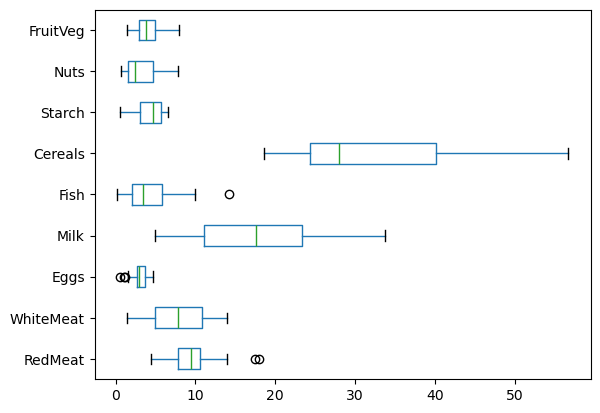

In [5]:
proteindata.boxplot(grid=False, vert=False)

Como se puede apreciar es necesario que transformar los datos para que estos estén en la misma escala y los podamos comparar.

In [6]:
scaler = StandardScaler()
scaler.fit(proteindata)
data_scaled = scaler.transform(proteindata)

<Axes: >

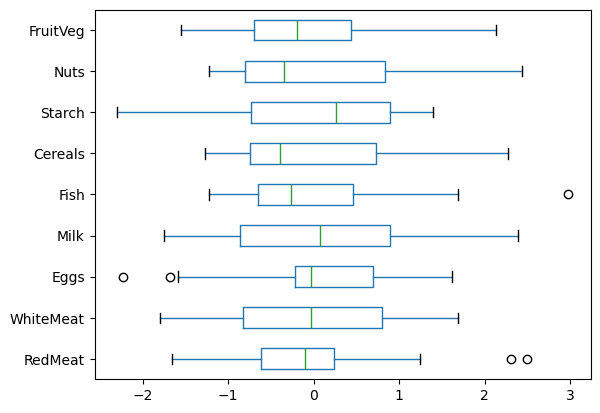

In [7]:
protein_scaled = pd.DataFrame(data_scaled, columns=proteindata.columns, index=proteindata.index)
protein_scaled.boxplot(grid=False, vert=False)

### Kmeans

El módulo `sklearn.cluster` nos ofrece la función `KMeans()` que implementa la técnica de clustering de las **K medias**. Los parámetros más importantes de esta función son:
- **n_clusters (int)**: número de clusters objetivo.
- **init**: Método de inicialización de los centroides. Se puede utilizar **k-means++**, que es el valor por defecto o la inicialización aleatoria, **ramdom**. También se le puede pasar una matriz con las coordenadas de los centroides.
- **n_init (int)**: número de veces que se ejecuta el algoritmo con diferentes inicializaciones de los centroides. Se puede indiciar también **auto** y en ese caso se inicializará a 10 en el caso de que `init='random'` o 1 en el caso de `init='k-means++'`.
- **max_iter (int)**: número máximo de iteraciones del algoritmo para cada ejecución. También se le puede indicar la tolerancia, a través del parámetro **tol (float)**, a partir de la cual se considera que la diferencia de los centroides ha hecho converger al algoritmo.
- **random_state**: determina la semilla para la inicialización aleatoria de los centroides. Es importante utilizar este parámetro para garantizar la reproducibilidad.

A continuación se puede ver un ejemplo de como aplicar la técnica de las `K medias` al conjunto de datos de ejemplo.


In [8]:
clusters_kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
clusters_kmeans.fit(protein_scaled)

c:\Users\fcoja\anaconda3\envs\cid-upct\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\fcoja\anaconda3\envs\cid-upct\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\fcoja\anaconda3\envs\cid-upct\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\fcoja\anaconda3\envs\cid-upct\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\fcoja\anaconda3\envs\cid-upct\Lib\sub

KMeans(n_clusters=4, n_init=10, random_state=0)

Para poder ver la a qué cluster se ha asignado cada instancia sólo tenemos que acceder al atributo **labels_** del objeto generado.

In [9]:
clusters_kmeans.labels_

array([1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 1, 2, 0, 2, 3, 1, 3, 0, 2, 2,
       1, 2, 1])

De la misma forma, en el atributo **cluster_centers_** del mismo objeto tenemos la información sobre las coordenadas de los centroides, que pueden ser interesante para mostrar los resultados de forma gráfica.

In [10]:
clusters_kmeans.cluster_centers_

array([[ 0.00670843, -0.23373748,  0.19542735,  1.37362771,  1.18213867,
        -0.890259  ,  0.17113559, -0.97503902, -1.13779293],
       [-0.62220731, -0.66888703, -0.91184211, -0.74505981, -0.70010446,
         1.26378091, -0.91407642,  1.06164634, -0.0628021 ],
       [ 0.6262684 ,  0.78977447,  0.73090162,  0.31297814, -0.26516381,
        -0.5252463 ,  0.4294856 , -0.62575946,  0.10821917],
       [-0.96906387, -1.20073649, -0.76344517, -1.48839594,  1.89454145,
        -0.385751  ,  0.95186365,  1.14516971,  1.93158879]])

A continuación, al igual que hicimos con el agrupamiento jerárquico, podemos ver los resultados del clustering utilizando un gráfico de dispersión al que le añadimos los centroides de cada cluster.

C:\Users\fcoja\AppData\Local\Temp\ipykernel_19000\1525686573.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(label, (protein_scaled["RedMeat"][i], protein_scaled["Fish"][i]),


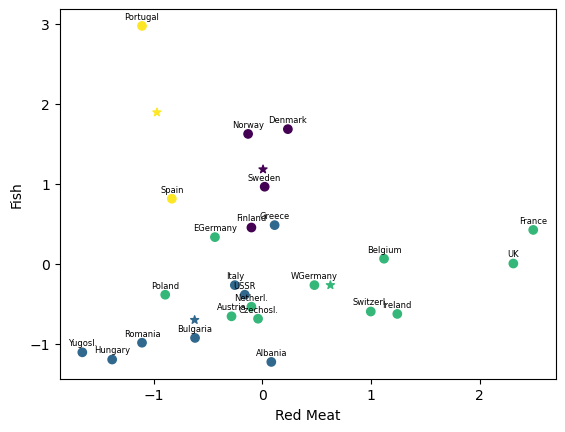

In [11]:
fig, ax = plt.subplots()
centers_x = clusters_kmeans.cluster_centers_[:,protein_scaled.columns.get_loc('RedMeat')]
center_y = clusters_kmeans.cluster_centers_[:,protein_scaled.columns.get_loc('Fish')]
paises = np.array(protein_scaled.index).astype(str)

plt.scatter(protein_scaled["RedMeat"],protein_scaled["Fish"],
             c=clusters_kmeans.labels_, cmap='viridis')
for i, label in enumerate(paises):
    plt.annotate(label, (protein_scaled["RedMeat"][i], protein_scaled["Fish"][i]),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=6)
plt.scatter(centers_x,center_y,marker="*",c=[0,1,2,3],cmap='viridis')
plt.xlabel('Red Meat')
plt.ylabel('Fish')
plt.show()

También podemos usar la función **kmeans2()** del módulo `scipy.cluster.vq`. En este caso se utiliza el parámetro **k (int)** para indicar el número de clusters y se devuelven dos arrays uno con los centroides y otro con la asignación de instancias a los diferentes clusters. Aquí puedes ver un ejemplo de como utilizarla.

In [12]:
centroids, labels = vq.kmeans2(protein_scaled,k=4,minit="++",seed=0,iter=10)

In [13]:
centroids

array([[-0.51929382, -1.13166513, -0.4209907 , -0.84919869,  1.00216323,
         0.13270653, -0.18799932,  1.33791596,  1.66284109],
       [ 0.00670843, -0.23373748,  0.19542735,  1.37362771,  1.18213867,
        -0.890259  ,  0.17113559, -0.97503902, -1.13779293],
       [ 0.6262684 ,  0.78977447,  0.73090162,  0.31297814, -0.26516381,
        -0.5252463 ,  0.4294856 , -0.62575946,  0.10821917],
       [-0.80643515, -0.53765145, -1.18961073, -0.9234126 , -0.97006761,
         1.46798653, -0.77614779,  0.90530771, -0.54843392]])

In [14]:
labels

array([3, 2, 2, 3, 2, 1, 2, 1, 2, 0, 3, 2, 0, 2, 1, 2, 0, 3, 0, 1, 2, 2,
       3, 2, 3])

### Kmedoids

La técnica de clustering de **K medoides** o **PAM (Partition Arround Medoids)** se puede aplicar a través de la función `KMedoids()` del módulo `sklearn_extra.cluster`. Los parámetros más importantes son:

- **n_clusters (int)**: número de clusters objetivo.
- **metric** métrica de distancia a utilizar (por defecto está inicializado a 'euclidean').
- **init**: Método de inicialización de los centroides. Se puede utilizar **k-medoids++**, que es el valor por defecto o la inicialización aleatoria, **ramdom**. También se le puede pasar una matriz con las coordenadas de los centroides. Otras opciones son: **heuristic**, que selecciona las *n_clusters* instancias con menor distancia total al resto de los elementos, o **build**, inicialización de medoides voraz definida en la descripción original del algoritmo.
- **n_init (int)**: número de veces que se ejecuta el algoritmo con diferentes inicializaciones de los centroides. Se puede indiciar también **auto** y en ese caso se inicializará a 10 en el caso de que `init='random'` o 1 en el caso de `init='k-means++'`.
- **max_iter (int)**: número máximo de iteraciones del algoritmo para cada ejecución. También se le puede indicar la tolerancia, a través del parámetro **tol (float)**, a partir de la cual se considera que la diferencia de los centroides ha hecho converger al algoritmo.
- **random_state**: determina la semilla para la inicialización aleatoria de los centroides. Es importante utilizar este parámetro para garantizar la reproducibilidad.

Para aplicar esta técnica  nuestro dataset hay que seguir los mismos pasos que indicamos en la aplicación de las *K medias*.

In [16]:
from sklearn_extra.cluster import KMedoids

clusters_kmediods = KMedoids(n_clusters=4,random_state=0).fit(protein_scaled)

ModuleNotFoundError: No module named 'sklearn_extra'

In [ ]:
clusters_kmediods.labels_

In [ ]:
clusters_kmediods.medoid_indices_

Otra librería interesante que implementa esta técnica es [kmedoids](https://python-kmedoids.readthedocs.io/en/latest/), que implementa versiones más eficientes de *K medoides*. Recuerda que para datasets grandes conviene utilizar la versión **Clara** del *K medoides*.

#### Ejercicio 1: Regla del codo

En este ejercicio vamos a desarrollar todos los pasos necesarios para aplicar la regla del codo. Recuerda que tenemos que calcular la distancia intracluster para determinados números de clusters y elegir aquel en el que se produzca un cambio de tendencia.

In [ ]:
## Define una array vacío, wss, para ir almacenando la distancia intracluster para cada número de clusters elegido.
## PON TU CÓDIGO AQUÍ


## Definir un bucle que vaya del número mínimo de clusters al número máximo de clusters.
## Para cada número de clusters aplicar el algoritmo k-medias.
## Una vez aplicado el algoritmo determinar la suma de distancia intraclusters y añadirla al array wss.
## PON TU CÓDIGO AQUÍ



## Una vez terminado el bucle crear un gráfico con los diferentes números de clusters en el eje X y la distancia intracluster en el eje Y.
## PON TU CÓDIGO AQUÍ





¿Cuál crees que puede ser el k óptimo?

#### Ejercicio 2. Selección del número de cluster óptimo utilizando el índice silueta.
Repite el ejercicio anterior pero dentro del bucle calcula el índice silueta medio. Recuerda que el **k** óptimo será el que tenga asociado el índice máximo

In [19]:
# PON TU CÓIDIGO AQUÍ

### DBSCAN

El método de clustering **DBSCAN** lo podemos aplicar utilizando la función `DBSCAN()` del módulo `sklearn.cluster`. Los parámetros más importantes son:

- **eps (float)**: radio para la definición de la *epsilon-vecindad* (por defecto 0.5).
- **min_samples (int)**: mínimo número de puntos en la  *epsilon-vecindad* para definir un punto núcleo (por defecto 5).
- **metric**: métrica de distancia a utilizar, por defecto `metric='euclidean'`.

Los parámetros *eps* y *min_samples* son críticos para el funcionamiento del algoritmo. Para seleccionarlos de forma adecuada hay que analizar un gráfico en el que se muestren de forma ordenada de mayor a menor las distancias de cada punto a los `min_samples` instancias más cercanas. Esto se puede hacer utilizando la función  `NearestNeighbors()` del módulo `sklearn.neighbors` que nos devuelve una matriz de dimensiones $n\_samples \times n\_vecinos-1$ (la primera columna es la distancia de cada punto consigo mismo, la segunda es la distancia al segundo punto más cercano y, así, sucesivamente).

Vamos a construir el gráfico de las *KNN distancias**:

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Llamamos a la función NearestNeighbors para calcular la distancia a los 4 vecinos más cercanos.
neighbors = NearestNeighbors(n_neighbors=4).fit(protein_scaled)

# Extraemos las distancias y los índices de los vecinos más cercanos con la función kneighbors().
distances, indices = neighbors.kneighbors(protein_scaled)

# Elimina la primera columna ya que contiene la distancia de cada punto consigo mismo
distances = distances[:,1:].reshape(-1)

# Transforma la matriz de distancia en una array de dimensión 1.
distances = distances.reshape(-1)

# Ordena las distancias en orden descendente
distances = np.sort(distances, axis=0)

# Crea un gráfico en el que el eje y represente las distancias.
plt.plot(distances)


Cómo se puede apreciar en el gráfico hay dos cambios de tendencia, uno muy evidente en torno a 3 y otro, más suave cercano a 2.5. Habría que probar estos valores teniendo en cuenta que min_samples lo hemos fijado a 3. Vamos a empezar con `eps=3.0`

In [21]:
clusters_dbscan = DBSCAN(eps=3,min_samples=3).fit(protein_scaled)

Para determinar qué cluster ha sido asignado a cada instancia debemos acceder al atributo `labels_` del objeto generado.

In [ ]:
clusters_dbscan.labels_

Como podemos apreciar, se han asignado todos las instancias al mismo cluster, con lo que parece lógico que probemos con un valor localizdo cercano a 2.5

In [23]:
clusters_dbscan = DBSCAN(eps=2.3,min_samples=3).fit(protein_scaled)

In [ ]:
clusters_dbscan.labels_

#### Ejercicio 3.
1. ¿Qué crees que significa el cluster marcado con la etiqueta -1?
2. Construye un algortimo para encontrar el eps óptimo utilizando el índice silueta.
